# Visualizations for Presentation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from datetime import datetime

import plotly.express as px
#import geopandas as gpd
#from shapely.geometry import Point, Polygon

from src import eda_feat_eng_utils
from src.eda_feat_eng_utils import return_true_if_in_list

### Import Dataset

In [3]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)

### Speed Limit

In [12]:
speed_df = accidents.groupby('POSTED_SPEED_LIMIT')['is_fatal_or_incap'].agg(['count', 'sum'])
speed_df = pd.DataFrame(speed_df).reset_index()
speed_df['']

In [22]:
def round_to_five_based(speed):
    if speed % 5 == 0:
        return speed
    else:
        return (speed // 5 + 1) * 5

In [32]:
speed_df['posted_speed_limit'] = speed_df['POSTED_SPEED_LIMIT'].apply(lambda x: round_to_five_based(x))
speed_df2 = speed_df.groupby('posted_speed_limit').agg({'count': 'sum',
                                                          'sum': 'sum'}).reset_index()
speed_df2['prcnt_fatal'] = speed_df2['sum'] / speed_df2['count']

In [33]:
speed_df2

,posted_speed_limit,count,sum,prcnt_fatal
0,0,3743,47,0.012557
1,5,2401,15,0.006247
2,10,5793,38,0.006560
3,15,10018,80,0.007986
4,20,11584,120,0.010359
5,25,17845,278,0.015579
6,30,216402,4182,0.019325
7,35,20471,586,0.028626
8,40,2770,93,0.033574
9,45,1705,60,0.035191


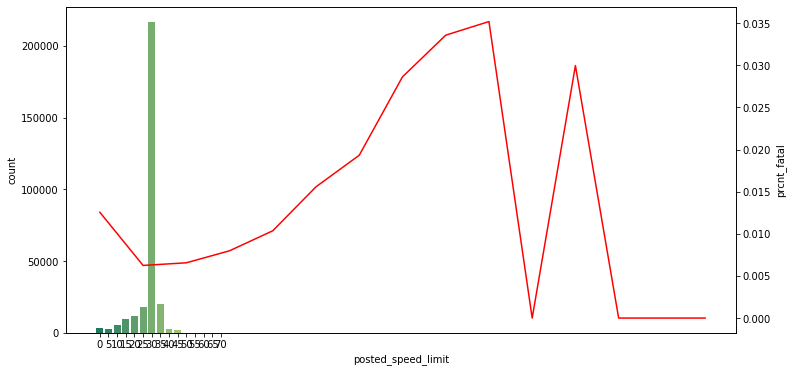

In [41]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1 = sns.barplot(x='posted_speed_limit', y='count',  data=speed_df2, palette='summer')

ax2=ax1.twinx()

ax2 = sns.lineplot(x='posted_speed_limit', y='prcnt_fatal', data=speed_df2, sort=False, color='red')

### Distribution by Hour of the Day

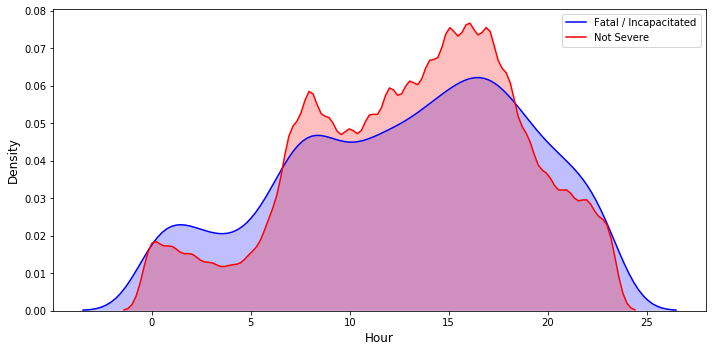

In [47]:
df = accidents
class_col = 'is_fatal_or_incap'
fatal_arr = df[df[class_col] == 1]['CRASH_HOUR'].values
not_fatal_arr = df[df[class_col] == 0]['CRASH_HOUR'].values


fig, ax = plt.subplots(figsize=(10,5))
ax = sns.kdeplot(fatal_arr, shade=True, color="b", label = 'Fatal / Incapacitated')
ax = sns.kdeplot(not_fatal_arr, shade=True, color="r", label = 'Not Severe')
ax.legend()
# ax.set_title(title, fontsize=18)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
fig.tight_layout();

fig.savefig('img/hour_of_day_distribution.png')